import pandas!

In [1]:
import pandas as pd

Load all the dataframes

In [9]:
suppliers = pd.read_csv("https://www.dropbox.com/s/jjbacrux6bc1b4s/suppliers.csv?dl=1")
demand = pd.read_csv("https://www.dropbox.com/s/0yikq3pugq87vl9/demand_forecasts.csv?dl=1")
recipes = pd.read_csv("https://www.dropbox.com/s/az97voeh6i8x3i2/recipes.csv?dl=1")

In [10]:
suppliers

,supp_id,ingredient_uuid,cost_per_unit,unit_name,country_of_origin,total_tax_per_unit,time_to_deliver
0,megacorp,cocoa,2500.0,tonne,ghana,14,12
1,megacorp,milk_powder,3200.0,tonne,france,12,3
2,megacorp,hazelnut,1918.0,tonne,turkey,12,4
3,megacorp,sugar,457.0,tonne,brazil,5,9
4,megacorp,vanilla,237.0,tonne,china,3,10
5,omni_inc,cocoa,2400.0,tonne,cote d'ivoire,14,12
6,omni_inc,milk_powder,3120.0,tonne,switzerland,0,2
7,omni_inc,hazelnut,1925.0,tonne,italy,12,3
8,omni_inc,sugar,465.0,tonne,india,5,12
9,omni_inc,vanilla,201.0,tonne,indonesia,3,12


In [11]:
demand

,rec_id,month,demand
0,1,jan,16443
1,1,feb,18943
2,1,mar,19727
3,1,apr,10368
4,1,may,15125
5,1,jun,18413
6,1,jul,17442
7,1,aug,19986
8,1,sep,15302
9,1,oct,13637


In [12]:
recipes

,rec_id,ingredient_uuid,cost_to_process,time_to_process,qty
0,1,cocoa,0.20,120,13
1,1,milk_powder,0.03,110,12
2,1,hazelnut,0.08,45,4
3,1,sugar,0.40,80,5
4,2,vanilla,0.10,34,3
5,2,cocoa,0.20,120,12
6,2,milk_powder,0.03,110,11
7,2,sugar,0.40,80,4
8,3,hazelnut,0.08,45,3
9,3,vanilla,0.10,34,2


Choose suppliers for each ingredient for each product.
Select the cheapest option, and the least tax option, and the fastest option.


In [13]:
cheapest_supplier = suppliers.loc[suppliers.groupby('ingredient_uuid')['cost_per_unit'].idxmin()]
cheapest_supplier

,supp_id,ingredient_uuid,cost_per_unit,unit_name,country_of_origin,total_tax_per_unit,time_to_deliver
10,acme_inc,cocoa,2370.0,tonne,indonesia,14,12
12,acme_inc,hazelnut,1817.0,tonne,usa,12,8
6,omni_inc,milk_powder,3120.0,tonne,switzerland,0,2
3,megacorp,sugar,457.0,tonne,brazil,5,9
14,acme_inc,vanilla,185.0,tonne,madagascar,3,12


In [14]:
suppliers.loc[suppliers.groupby('ingredient_uuid')['total_tax_per_unit'].idxmin()]

,supp_id,ingredient_uuid,cost_per_unit,unit_name,country_of_origin,total_tax_per_unit,time_to_deliver
0,megacorp,cocoa,2500.0,tonne,ghana,14,12
2,megacorp,hazelnut,1918.0,tonne,turkey,12,4
6,omni_inc,milk_powder,3120.0,tonne,switzerland,0,2
3,megacorp,sugar,457.0,tonne,brazil,5,9
4,megacorp,vanilla,237.0,tonne,china,3,10


In [15]:
suppliers.loc[suppliers.groupby('ingredient_uuid')['time_to_deliver'].idxmin()]

,supp_id,ingredient_uuid,cost_per_unit,unit_name,country_of_origin,total_tax_per_unit,time_to_deliver
0,megacorp,cocoa,2500.0,tonne,ghana,14,12
7,omni_inc,hazelnut,1925.0,tonne,italy,12,3
6,omni_inc,milk_powder,3120.0,tonne,switzerland,0,2
3,megacorp,sugar,457.0,tonne,brazil,5,9
4,megacorp,vanilla,237.0,tonne,china,3,10


Work out total demand for each ingredient, using the demand for each product by month, and over a year.

In [16]:
ingredient_demand = demand.merge(recipes, on='rec_id')
ingredient_demand['ingredient_demand'] = ingredient_demand['demand']*ingredient_demand['qty']
ingredient_demand

,rec_id,month,demand,ingredient_uuid,cost_to_process,time_to_process,qty,ingredient_demand
0,1,jan,16443,cocoa,0.20,120,13,213759
1,1,jan,16443,milk_powder,0.03,110,12,197316
2,1,jan,16443,hazelnut,0.08,45,4,65772
3,1,jan,16443,sugar,0.40,80,5,82215
4,1,feb,18943,cocoa,0.20,120,13,246259
...,...,...,...,...,...,...,...,...
151,3,dec,13065,hazelnut,0.08,45,3,39195
152,3,dec,13065,vanilla,0.10,34,2,26130
153,3,dec,13065,cocoa,0.20,120,12,156780
154,3,dec,13065,milk_powder,0.03,11,12,156780


In [17]:
monthly_ingredient_demand = ingredient_demand.groupby(['ingredient_uuid','month'])['ingredient_demand'].sum()
monthly_ingredient_demand

ingredient_uuid  month
cocoa            apr      384540
                 aug      618618
                 dec      496238
                 feb      591367
                 jan      539379
                 jul      511302
                 jun      615089
                 mar      522431
                 may      483137
                 nov      538973
                 oct      465221
                 sep      486290
hazelnut         apr       72255
                 aug      137247
                 dec      100355
                 feb      118345
                 jan      102840
                 jul      107052
                 jun      123308
                 mar      110747
                 may       90833
                 nov      112517
                 oct       85475
                 sep       92939
milk_powder      apr      363620
                 aug      587833
                 dec      469224
                 feb      557856
                 jan      508157
                 jul

ingredient_uuid
cocoa          AxesSubplot(0.125,0.125;0.775x0.755)
hazelnut       AxesSubplot(0.125,0.125;0.775x0.755)
milk_powder    AxesSubplot(0.125,0.125;0.775x0.755)
sugar          AxesSubplot(0.125,0.125;0.775x0.755)
vanilla        AxesSubplot(0.125,0.125;0.775x0.755)
Name: ingredient_demand, dtype: object

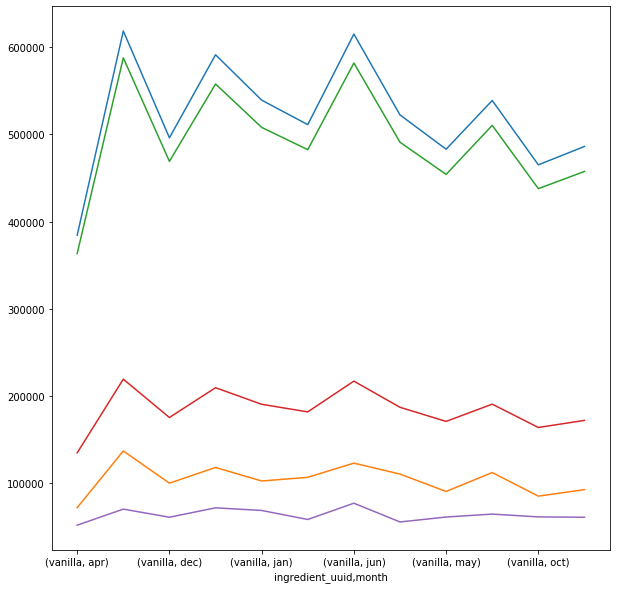

In [18]:
monthly_ingredient_demand.groupby('ingredient_uuid').plot(figsize=(10,10))

In [19]:
ingredient_demand.merge(cheapest_supplier, on='ingredient_uuid')
ingredient_demand['ingredient_demand'] = ingredient_demand['demand']*ingredient_demand['qty']
ingredient_demand

,rec_id,month,demand,ingredient_uuid,cost_to_process,time_to_process,qty,ingredient_demand
0,1,jan,16443,cocoa,0.20,120,13,213759
1,1,jan,16443,milk_powder,0.03,110,12,197316
2,1,jan,16443,hazelnut,0.08,45,4,65772
3,1,jan,16443,sugar,0.40,80,5,82215
4,1,feb,18943,cocoa,0.20,120,13,246259
...,...,...,...,...,...,...,...,...
151,3,dec,13065,hazelnut,0.08,45,3,39195
152,3,dec,13065,vanilla,0.10,34,2,26130
153,3,dec,13065,cocoa,0.20,120,12,156780
154,3,dec,13065,milk_powder,0.03,11,12,156780


In [20]:
demand_by_supply = ingredient_demand.merge(cheapest_supplier, on='ingredient_uuid')
demand_by_supply['ingredient_cost'] = demand_by_supply['ingredient_demand']*demand_by_supply['cost_per_unit']
demand_by_supply

,rec_id,month,demand,ingredient_uuid,cost_to_process,time_to_process,qty,ingredient_demand,supp_id,cost_per_unit,unit_name,country_of_origin,total_tax_per_unit,time_to_deliver,ingredient_cost
0,1,jan,16443,cocoa,0.2,120,13,213759,acme_inc,2370.0,tonne,indonesia,14,12,506608830.0
1,1,feb,18943,cocoa,0.2,120,13,246259,acme_inc,2370.0,tonne,indonesia,14,12,583633830.0
2,1,mar,19727,cocoa,0.2,120,13,256451,acme_inc,2370.0,tonne,indonesia,14,12,607788870.0
3,1,apr,10368,cocoa,0.2,120,13,134784,acme_inc,2370.0,tonne,indonesia,14,12,319438080.0
4,1,may,15125,cocoa,0.2,120,13,196625,acme_inc,2370.0,tonne,indonesia,14,12,466001250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,3,aug,19101,vanilla,0.1,34,2,38202,acme_inc,185.0,tonne,madagascar,3,12,7067370.0
152,3,sep,10577,vanilla,0.1,34,2,21154,acme_inc,185.0,tonne,madagascar,3,12,3913490.0
153,3,oct,10309,vanilla,0.1,34,2,20618,acme_inc,185.0,tonne,madagascar,3,12,3814330.0
154,3,nov,15003,vanilla,0.1,34,2,30006,acme_inc,185.0,tonne,madagascar,3,12,5551110.0


Work out total cost per unit to product


In [21]:
demand_by_supply.groupby('rec_id')['ingredient_cost'].sum()

rec_id
1    1.537022e+10
2    9.932093e+09
3    1.136516e+10
Name: ingredient_cost, dtype: float64

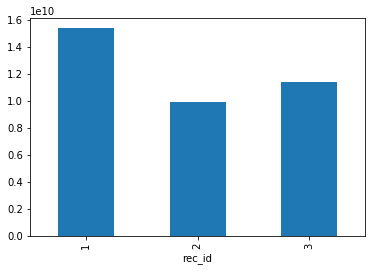

In [22]:
demand_by_supply.groupby('rec_id')['ingredient_cost'].sum().plot.bar()

(Homework) work out how to find the total cost of goods needed for each producer country.


(Homework) work out how to find the total tax, using the cheapest supplier for each ingredient, to create 1000 of each recipe.